In [7]:
# Cities & Weather

#This activity provides practice making API calls iteratively.

## Instructions

#For this exercise, either work with `cities.csv` as provided, or add a few cities of your own. If you finish the main challenge and feel ambitious, try using a subset of [CountriesToCities.json](https://github.com/David-Haim/CountriesToCitiesJSON) for this activity.

#* Load your `cities.csv` file, and use it to create a list of city names you can search for.

#* Request weather information on each city, and store each response in a list.

#* Collect longitude and atmospheric pressure data for each city. Use the API documentation to determine which keys to extract.

#* Put this data into a dict, and load that dict into a Pandas DataFrame.

#* Use matplotlib to create a scatter plot of pressures vs longitudes.

In [8]:
# Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd

api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

weather_data = []
cities = ["Paris","London","Oslo","Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_data.append(response)

weather_data

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 48.86, 'lon': 2.35},
  'dt': 1518892200,
  'id': 2988507,
  'main': {'humidity': 75,
   'pressure': 1024,
   'temp': 4,
   'temp_max': 5,
   'temp_min': 3},
  'name': 'Paris',
  'sys': {'country': 'FR',
   'id': 5610,
   'message': 0.0041,
   'sunrise': 1518850445,
   'sunset': 1518887744,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
    'icon': '01n',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 2.50003, 'speed': 2.21}},
 {'base': 'stations',
  'clouds': {'all': 32},
  'cod': 200,
  'coord': {'lat': 51.51, 'lon': -0.13},
  'dt': 1518891600,
  'id': 2643743,
  'main': {'humidity': 61,
   'pressure': 1023,
   'temp': 6.45,
   'temp_max': 8,
   'temp_min': 4},
  'name': 'London',
  'sys': {'country': 'GB',
   'id': 5091,
   'message': 0.0064,
   'sunrise': 1518851351,
   'sunset': 1518888032,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'sca

In [9]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q='

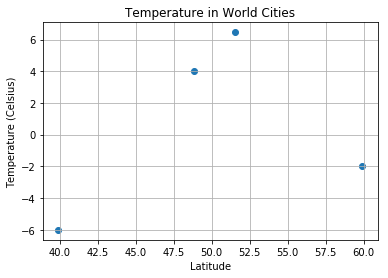

In [10]:
# Extract interesting data from responses
lat_data = [data.get("coord").get("lat") for data in weather_data]
temp_data = [data.get("main").get("temp") for data in weather_data]

weather_data = {"temp": temp_data, "lat": lat_data}
weather_data = pd.DataFrame(weather_data)
weather_data.head()

# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()